**Week 5: GANs**

In [1]:
import glob
import matplotlib.pyplot as plt
import numpy as np

**Exploratory Data Analysis**

Based on the information/code below and the information provided by the kaggle website, we know several things about this set of data. First off, 'The dataset contains four directories: monet_tfrec, photo_tfrec, monet_jpg, and photo_jpg. The monet_tfrec and monet_jpg directories contain the same painting images, and the photo_tfrec and photo_jpg directories contain the same photos.'

Additionally, 'The monet directories contain Monet paintings. Use these images to train your model.

The photo directories contain photos. Add Monet-style to these images and submit your generated jpeg images as a zip file. Other photos outside of this dataset can be transformed but keep your submission file limited to 10,000 images.'

In my assignment, I decided to import the monet_jpg file as well as gray images to both train and validate the models. 

As stated below, there were 300 images in the monet_jpg file - you can see the summary statistics and plots below as well. 

In [2]:
images = glob.glob("/kaggle/input/gan-getting-started/monet_jpg/*")

In [3]:
images

['/kaggle/input/gan-getting-started/monet_jpg/f4413e97bd.jpg',
 '/kaggle/input/gan-getting-started/monet_jpg/7341d96c1d.jpg',
 '/kaggle/input/gan-getting-started/monet_jpg/de6f71b00f.jpg',
 '/kaggle/input/gan-getting-started/monet_jpg/99d94af5dd.jpg',
 '/kaggle/input/gan-getting-started/monet_jpg/99a51d3e25.jpg',
 '/kaggle/input/gan-getting-started/monet_jpg/d05cab011d.jpg',
 '/kaggle/input/gan-getting-started/monet_jpg/4e05523825.jpg',
 '/kaggle/input/gan-getting-started/monet_jpg/c68c52e8fc.jpg',
 '/kaggle/input/gan-getting-started/monet_jpg/40d7d18ad3.jpg',
 '/kaggle/input/gan-getting-started/monet_jpg/f96a8de9f3.jpg',
 '/kaggle/input/gan-getting-started/monet_jpg/79224da51f.jpg',
 '/kaggle/input/gan-getting-started/monet_jpg/23832dead5.jpg',
 '/kaggle/input/gan-getting-started/monet_jpg/85580214be.jpg',
 '/kaggle/input/gan-getting-started/monet_jpg/47a0548067.jpg',
 '/kaggle/input/gan-getting-started/monet_jpg/fb93438ff9.jpg',
 '/kaggle/input/gan-getting-started/monet_jpg/89d970411

In [4]:
len(images)

300

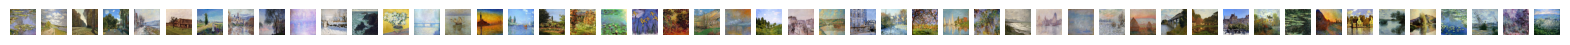

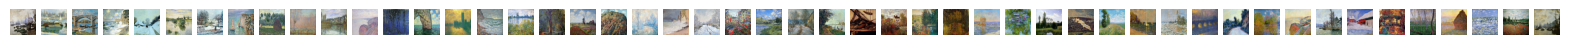

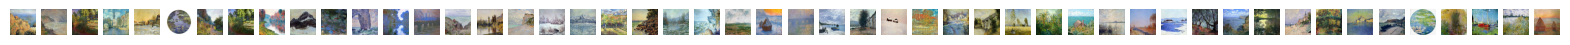

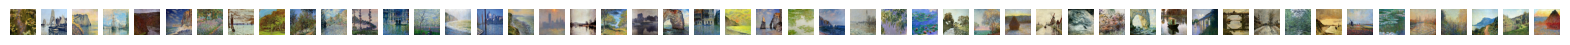

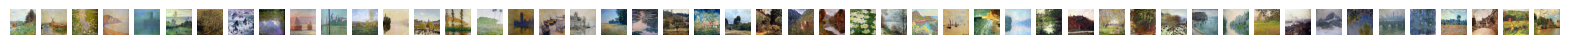

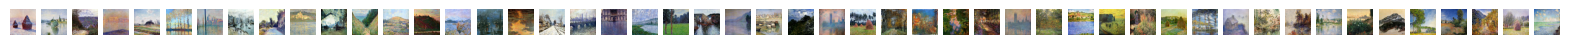

In [5]:
plt.figure(figsize=(20,20))
for i in np.arange(50):
    plt.subplot(1,50,i+1)
    plt.imshow(plt.imread(images[i]))
    plt.axis("off")
plt.figure(figsize=(20,20));
for i in np.arange(50):
    plt.subplot(2,50,i+1)
    plt.imshow(plt.imread(images[50+i]));
    plt.axis("off")
plt.figure(figsize=(20,20));
for i in np.arange(50):
    plt.subplot(3,50,i+1)
    plt.imshow(plt.imread(images[100+i]));
    plt.axis("off")

plt.figure(figsize=(20,20))
for i in np.arange(50):
    plt.subplot(4,50,i+1)
    plt.imshow(plt.imread(images[150+i]))
    plt.axis("off")
plt.figure(figsize=(20,20));
for i in np.arange(50):
    plt.subplot(5,50,i+1)
    plt.imshow(plt.imread(images[200+i]));
    plt.axis("off")
plt.figure(figsize=(20,20));
for i in np.arange(50):
    plt.subplot(6,50,i+1)
    plt.imshow(plt.imread(images[250+i]));
    plt.axis("off")

In [6]:
plt.imread(images[0]).shape

(256, 256, 3)

In [7]:
import cv2
gray_images = []
for i in images:
    gray_images.append(cv2.cvtColor(plt.imread(i), cv2.COLOR_BGR2GRAY))

In [8]:
images = np.array(gray_images)

**Procedure and Analysis**

In the following code chunks, I split the data/images into both test and train sets. I then run the model and validate with the test set. Please see the statistics and descriptors below for more details on the steps and process through the analysis.

In [9]:
x_train = [] 
for i in np.arange(200):
    x_train.append(images[i])

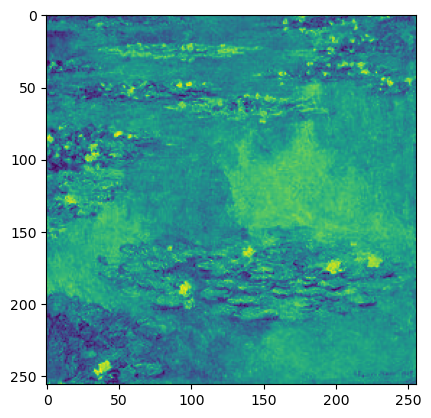

In [10]:
plt.imshow(x_train[0])

In [11]:
x_test = []
for i in np.arange(200,300):
    x_test.append(images[i])

In [12]:
x_train = np.array(x_train)
x_test = np.array(x_test)

In [13]:
x_train.shape

(200, 256, 256)

In [14]:
x_train[0]

array([[ 30,  24,  42, ...,  68, 146, 122],
       [ 30,  42,  27, ...,  92, 125,  96],
       [ 69,  61,  25, ...,  96, 108, 122],
       ...,
       [ 71,  89, 136, ..., 122, 132,  92],
       [ 76,  89, 151, ...,  96,  83,  83],
       [150, 147, 197, ...,  82,  99, 118]], dtype=uint8)

In [15]:
x_train = (x_train.astype(np.float32)-127.5)/127.5

In [16]:
x_train[0]

array([[-0.7647059 , -0.8117647 , -0.67058825, ..., -0.46666667,
         0.14509805, -0.04313726],
       [-0.7647059 , -0.67058825, -0.7882353 , ..., -0.2784314 ,
        -0.01960784, -0.24705882],
       [-0.45882353, -0.52156866, -0.8039216 , ..., -0.24705882,
        -0.15294118, -0.04313726],
       ...,
       [-0.44313726, -0.3019608 ,  0.06666667, ..., -0.04313726,
         0.03529412, -0.2784314 ],
       [-0.40392157, -0.3019608 ,  0.18431373, ..., -0.24705882,
        -0.34901962, -0.34901962],
       [ 0.1764706 ,  0.15294118,  0.54509807, ..., -0.35686275,
        -0.22352941, -0.07450981]], dtype=float32)

In [17]:
x_train.shape

(200, 256, 256)

In [18]:
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1]*x_train.shape[2])

In [19]:
x_train.shape

(200, 65536)

In [20]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Reshape, Flatten
from tensorflow.keras.layers import BatchNormalization, Activation
from tensorflow.keras.layers import Conv2D, Conv2DTranspose
from tensorflow.keras import layers
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import optimizers

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [21]:
def create_generator():
    generator = Sequential()
    generator.add(Dense(units=512,input_dim = 100))
    generator.add(layers.ReLU())
    
    generator.add(Dense(units=512))
    generator.add(layers.ReLU())
    
    generator.add(Dense(units=1024))
    generator.add(layers.ReLU())
    
    generator.add(Dense(units = 65536,activation = "tanh"))
    generator.compile(loss = "binary_crossentropy",
                     optimizer = Adam(lr=0.0001,beta_1=0.5))
    return generator

g = create_generator()
g.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               51712     
                                                                 
 re_lu (ReLU)                (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 re_lu_1 (ReLU)              (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 1024)              525312    
                                                                 
 re_lu_2 (ReLU)              (None, 1024)              0         
                                                                 
 dense_3 (Dense)             (None, 65536)             6

In [22]:
def create_discriminator():
    discriminator = Sequential()
    discriminator.add(Dense(units=1024,input_dim = 65536))
    discriminator.add(layers.ReLU())
    discriminator.add(layers.Dropout(0.4))
    
    discriminator.add(Dense(units=512))
    discriminator.add(layers.ReLU())
    discriminator.add(layers.Dropout(0.4))
    
    discriminator.add(Dense(units=256))
    discriminator.add(layers.ReLU())
    
    discriminator.add(Dense(units=1,activation="sigmoid"))
    discriminator.compile(loss="binary_crossentropy",
                         optimizer = Adam(lr=0.0001,beta_1=0.5))
    return discriminator

d = create_discriminator()
d.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1024)              67109888  
                                                                 
 re_lu_3 (ReLU)              (None, 1024)              0         
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_5 (Dense)             (None, 512)               524800    
                                                                 
 re_lu_4 (ReLU)              (None, 512)               0         
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_6 (Dense)             (None, 256)              

In [23]:
def create_gan(discriminator,generator):
    discriminator.trainable = False
    gan_input = Input(shape=(100,))
    x = generator(gan_input)
    gan_output = discriminator(x)
    gan = Model(inputs = gan_input,outputs = gan_output)
    gan.compile(loss="binary_crossentropy",optimizer="adam")
    return gan

gan = create_gan(d,g)
gan.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100)]             0         
                                                                 
 sequential (Sequential)     (None, 65536)             68014080  
                                                                 
 sequential_1 (Sequential)   (None, 1)                 67766273  
                                                                 
Total params: 135,780,353
Trainable params: 68,014,080
Non-trainable params: 67,766,273
_________________________________________________________________


In [24]:
epochs = 1
batch_size = 256

for e in range(epochs):
    for _ in range(batch_size):
        noise = np.random.normal(0,1,[batch_size,100])
        generated_images = g.predict(noise)
        image_batch = x_train[np.random.randint(low = 0,high = x_train.shape[0],size = batch_size)]
        x = np.concatenate([image_batch,generated_images])
        y_dis = np.zeros(batch_size*2)
        y_dis[:batch_size] = 1
        
        d.trainable = True
        d.train_on_batch(x,y_dis)
        
        noise = np.random.normal(0,1,[batch_size,100])
        y_gen = np.ones(batch_size)
        d.trainable = False
        
        gan.train_on_batch(noise,y_gen)
        
    print("epochs",e)

8/8 [==============================] - 1s 71ms/step
epochs 0


In [25]:
image_batch.shape

(256, 65536)

In [26]:
generated_images.shape

(256, 65536)

In [27]:
x_train.shape

(200, 65536)

4/4 [==============================] - 0s 55ms/step


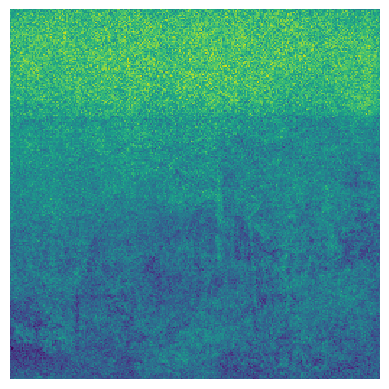

In [28]:
noise = np.random.normal(loc=0,scale=1,size=[100,100])
generated_images = g.predict(noise)
generated_images = generated_images.reshape(100,256,256)
plt.imshow(generated_images[0],interpolation="nearest")
plt.axis("off")
plt.show()

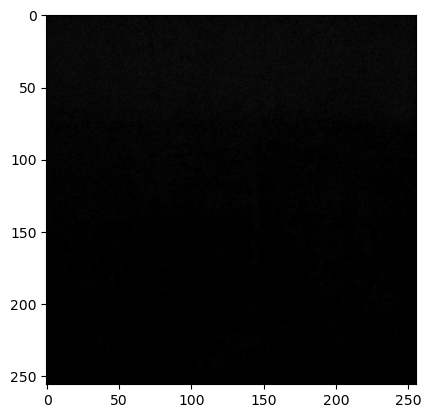

In [29]:
plt.imshow(cv2.cvtColor(generated_images[66], cv2.COLOR_GRAY2BGR))

**Results**

As seen above, the model did ok when analyzing the images. I believe it could have done better with some fine tuning, and dieeper digging. However, with that said, I am happy with how it turned out. I'm excited to keep learning more about GAN models and how to improve the analysis.

**Discussion and Analysis**

As stated above, I'm really excited to continue learning more about GAN models and how they can evolve the technology already implamented and the stuff coming in the near future. It was really cool to see the model work out, as I've been working on similar projects at work that use images. Based on this training exercise, I have several ideas that I want to take back and try to implament to see if I can improve the code, analysis and results.